#  **An Integrated Approach to Detecting and Mitigating Internal Misuse.**

In [ ]:
# Importing required libraries
import time
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Loading the dataset
url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
           "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
           "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
           "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
           "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
           "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
           "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [ ]:
# Reading the dataset
data = pd.read_csv(url, names=columns)

In [ ]:
# Printing the information of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [ ]:
# Checking the first few rows of the dataset
print(data.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [ ]:
# Printing the Data Shape
print("Data Shape:", data.shape)

Data Shape: (494021, 42)


In [ ]:
# Printing Basic statistics of numerical features
print(data.describe())

            duration     src_bytes     dst_bytes           land  \
count  494021.000000  4.940210e+05  4.940210e+05  494021.000000   
mean       47.979302  3.025610e+03  8.685324e+02       0.000045   
std       707.746472  9.882181e+05  3.304000e+04       0.006673   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.500000e+01  0.000000e+00       0.000000   
50%         0.000000  5.200000e+02  0.000000e+00       0.000000   
75%         0.000000  1.032000e+03  0.000000e+00       0.000000   
max     58329.000000  6.933756e+08  5.155468e+06       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   494021.000000  494021.000000  494021.000000      494021.000000   
mean         0.006433       0.000014       0.034519           0.000152   
std          0.134805       0.005510       0.782103           0.015520   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

In [ ]:
# Checking for missing values
print(data.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# Exploring the distribution of the label column
print("Label Value Counts:")
print(data['label'].value_counts())

Label Value Counts:
label
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64


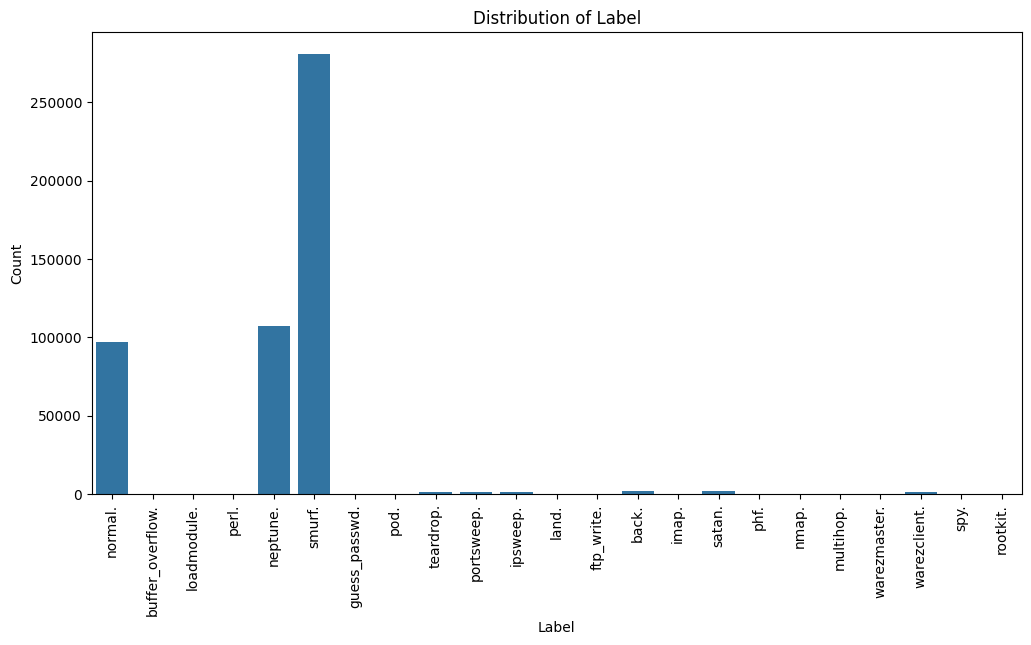

In [ ]:
# Visualizing the distribution of the label column
plt.figure(figsize=(12, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

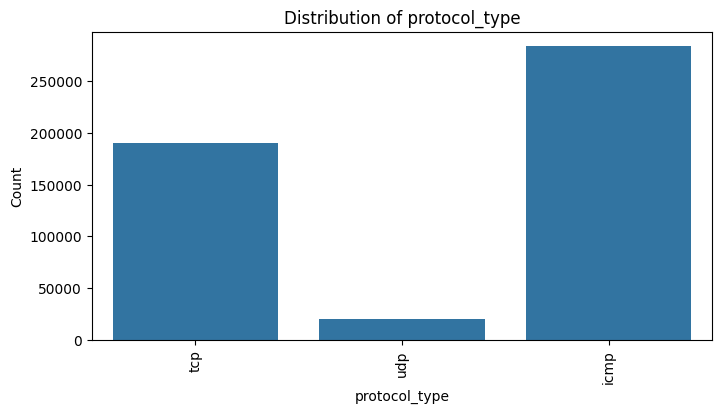

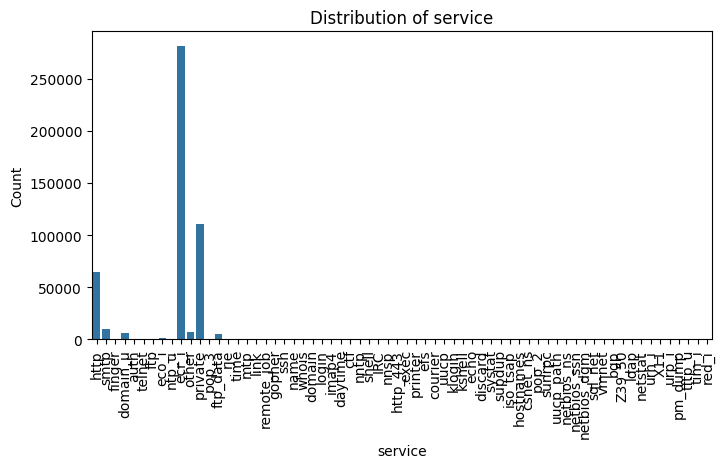

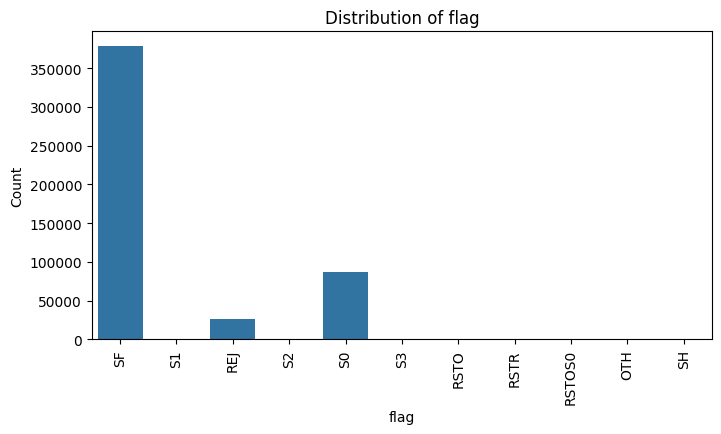

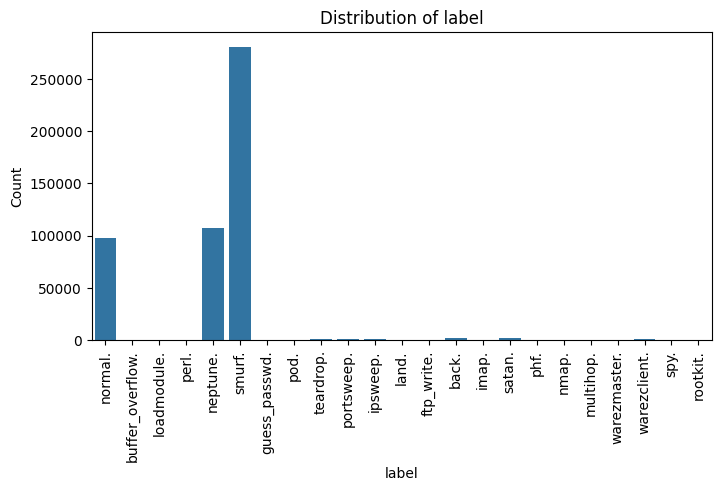

In [ ]:
# Exploring the distribution of categorical features
CategoricalFeatures = data.select_dtypes(include=['object'])
for column in CategoricalFeatures.columns:
  plt.figure(figsize=(8, 4))
  sns.countplot(x=column, data=data)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Count')
  plt.xticks(rotation=90)
  plt.show()

## User Activity Analysis

In [ ]:
# Calculating total connections initiated by each source IP address.
UserActivity = data.groupby('label')['duration'].count().reset_index()
print(UserActivity)

               label  duration
0              back.      2203
1   buffer_overflow.        30
2         ftp_write.         8
3      guess_passwd.        53
4              imap.        12
5           ipsweep.      1247
6              land.        21
7        loadmodule.         9
8          multihop.         7
9           neptune.    107201
10             nmap.       231
11           normal.     97278
12             perl.         3
13              phf.         4
14              pod.       264
15        portsweep.      1040
16          rootkit.        10
17            satan.      1589
18            smurf.    280790
19              spy.         2
20         teardrop.       979
21      warezclient.      1020
22      warezmaster.        20


## Service Activity Analysis

In [ ]:
# Analysing the distribution of connections to different services.
ServiceActivity = data.groupby('service')['label'].count().reset_index()
print(ServiceActivity)

      service  label
0         IRC     43
1         X11     11
2      Z39_50     92
3        auth    328
4         bgp    106
..        ...    ...
61      urp_i    538
62       uucp    106
63  uucp_path    106
64      vmnet    106
65      whois    110

[66 rows x 2 columns]


## Network Traffic Analysis

In [ ]:
# Analyzing the distribution of network traffic by protocol type.
ProtocolTraffic = data.groupby('protocol_type')['label'].count().reset_index()
print(ProtocolTraffic)

  protocol_type   label
0          icmp  283602
1           tcp  190065
2           udp   20354


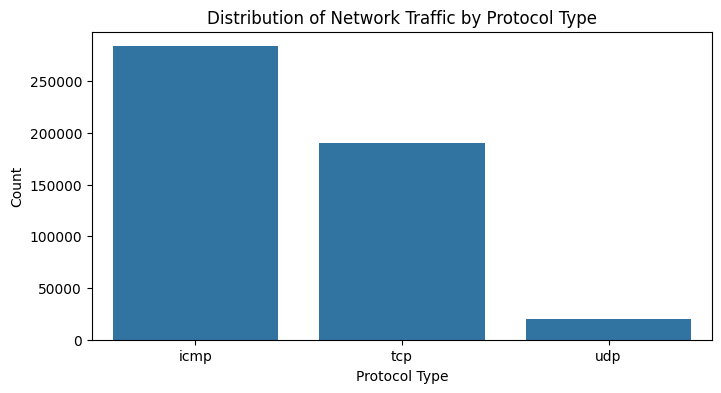

In [ ]:
# Plotting the distribution of network traffic by protocol type.
plt.figure(figsize=(8, 4))
sns.barplot(x='protocol_type', y='label', data=ProtocolTraffic)
plt.title('Distribution of Network Traffic by Protocol Type')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()

## Correlations Matrix

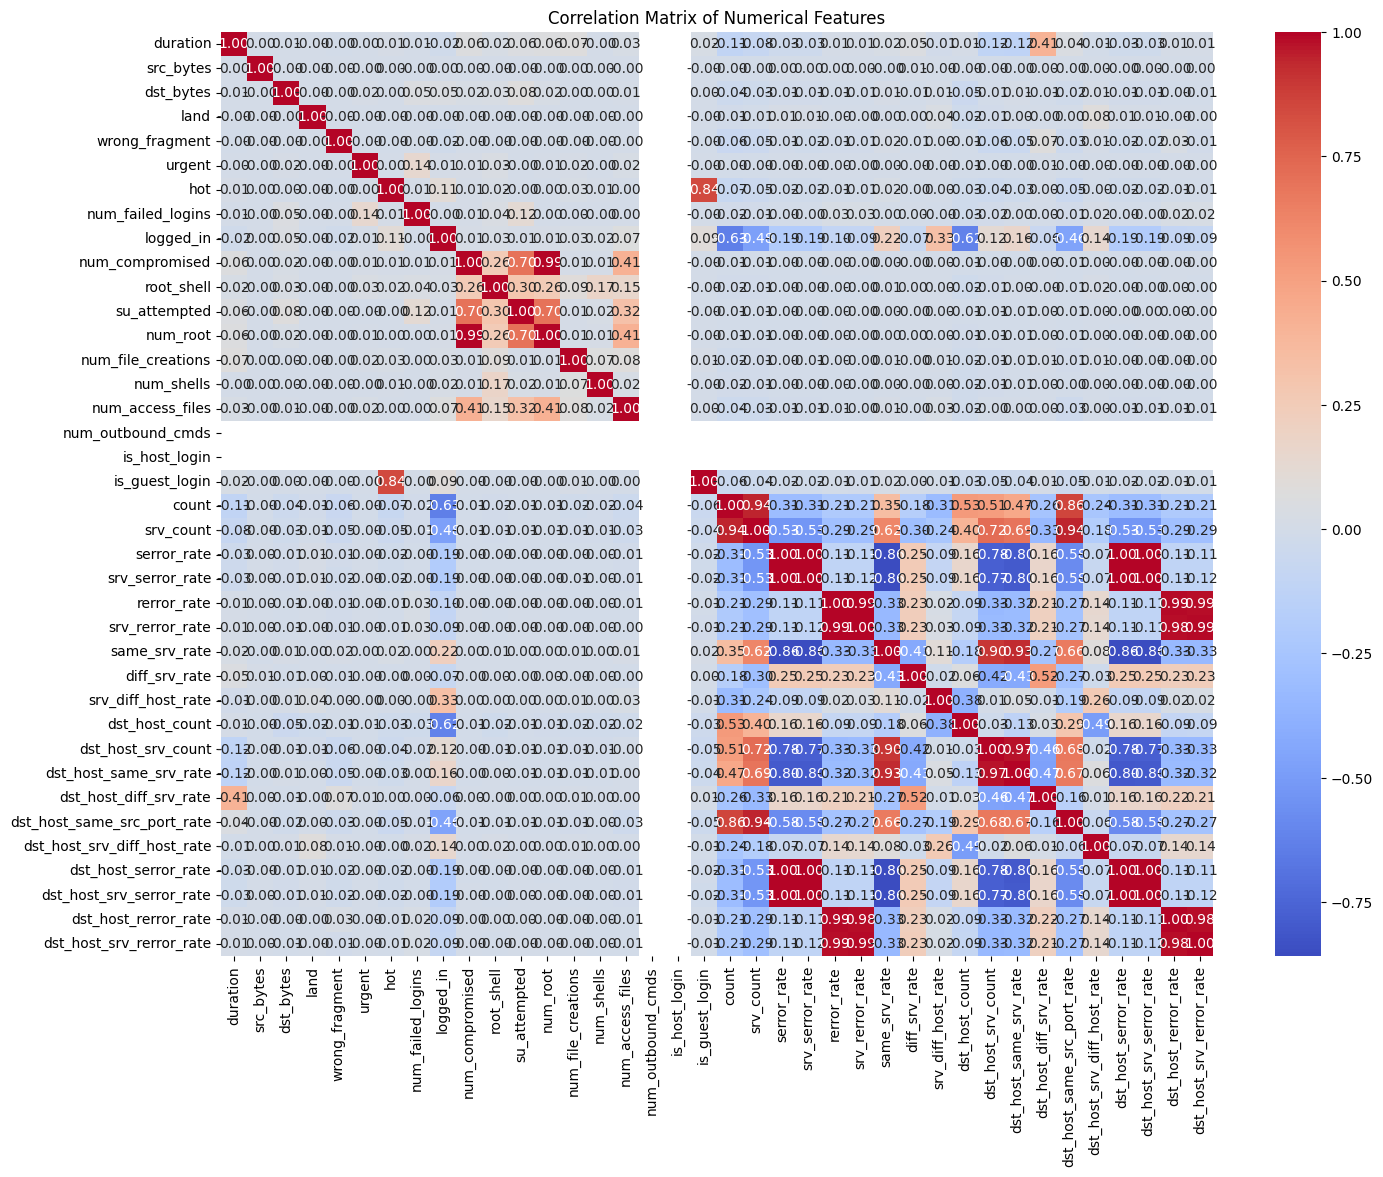

In [ ]:
# Exploring the correlation between numerical features
CorrelationMatrix = data.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(CorrelationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Processing for modelling

In [ ]:
# Encoding categorical columns
Labencoder = LabelEncoder()
CategoricalColumns = ['protocol_type', 'service', 'flag', 'label']
for col in CategoricalColumns:
    data[col] = Labencoder.fit_transform(data[col])

In [ ]:
# Separating features and labels
X = data.drop('label', axis=1)
y = data['label']

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Printing the Training-Testing Shape
print(f"X Training set size: {X_train.shape}")
print(f"X Testing set size: {X_test.shape}")
print(f"y Training target size: {y_train.shape}")
print(f"y Test target size: {y_test.shape}")

X Training set size: (345814, 41)
X Testing set size: (148207, 41)
y Training target size: (345814,)
y Test target size: (148207,)


## Modelling Implementation

In [ ]:
# Implementing the Random Forest classifier
RandomForestModel = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Training the model
RandomForestModel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predicting on the testing data
RandomForestModely_pred = RandomForestModel.predict(X_test)

In [ ]:
# Printing the performance of the model
print(f"Accuracy of the Random Forest Model: {accuracy_score(y_test, RandomForestModely_pred) * 100:.2f} %")
print(f"\nClassification Report: \n{classification_report(y_test, RandomForestModely_pred)}")

Accuracy of the Random Forest Model: 99.97 %

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       0.78      0.64      0.70        11
           2       1.00      1.00      1.00         1
           3       1.00      0.83      0.91        12
           4       1.00      0.67      0.80         3
           5       0.99      0.99      0.99       385
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         2
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00     32002
          10       0.98      0.97      0.98        61
          11       1.00      1.00      1.00     29192
          12       0.00      0.00      0.00         2
          14       1.00      1.00      1.00        60
          15       1.00      0.99      1.00       340
          16       0.00      0.00      0.00         2
          1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


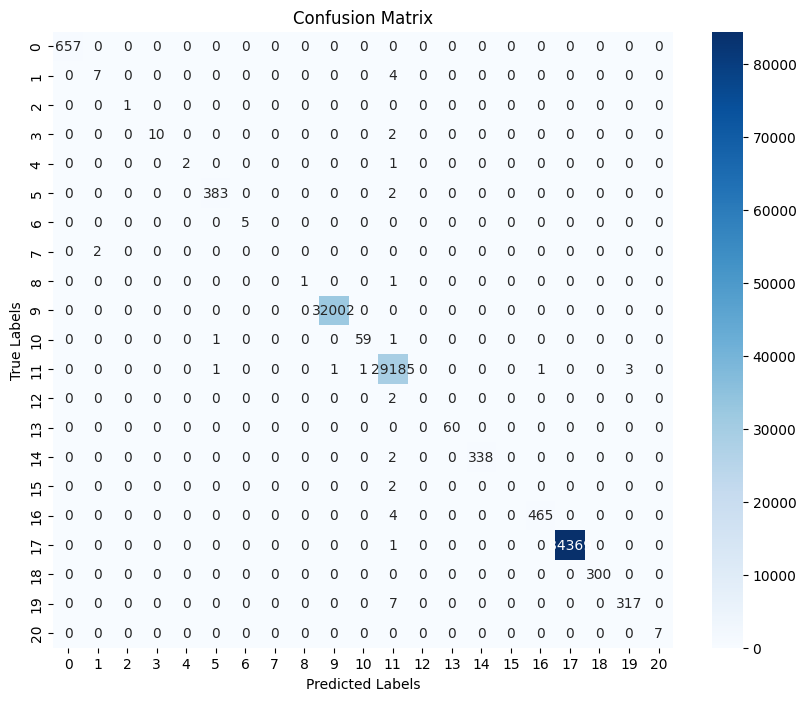

In [ ]:
# Plotting confusion matrix
RandomForestModelCM = confusion_matrix(y_test, RandomForestModely_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(RandomForestModelCM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Implementing the Decision Tree Classifier
DecisionTreeModel = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fitting a Decision Tree Classifier
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making Predictions for the Decision Tree Model
DecisionTreey_pred = DecisionTreeModel.predict(X_test)

In [ ]:
# Calculating the peformance of the Decision Tree Model
print(f"Accuracy of the Decision Tree Model: {accuracy_score(y_test, DecisionTreey_pred) * 100:.2f} %")

Accuracy of the Decision Tree Model: 99.96 %


In [ ]:
# Printing the classfication report of the Decision Tree Model
print(f"\nClassification Report: \n{classification_report(y_test, DecisionTreey_pred)}")


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       657
           1       0.75      0.55      0.63        11
           2       1.00      1.00      1.00         1
           3       1.00      0.83      0.91        12
           4       1.00      0.67      0.80         3
           5       0.99      1.00      1.00       385
           6       1.00      1.00      1.00         5
           7       0.00      0.00      0.00         2
           8       0.50      0.50      0.50         2
           9       1.00      1.00      1.00     32002
          10       0.97      1.00      0.98        61
          11       1.00      1.00      1.00     29192
          12       1.00      0.50      0.67         2
          14       1.00      1.00      1.00        60
          15       0.99      0.99      0.99       340
          16       0.00      0.00      0.00         2
          17       0.99      0.99      0.99       469
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


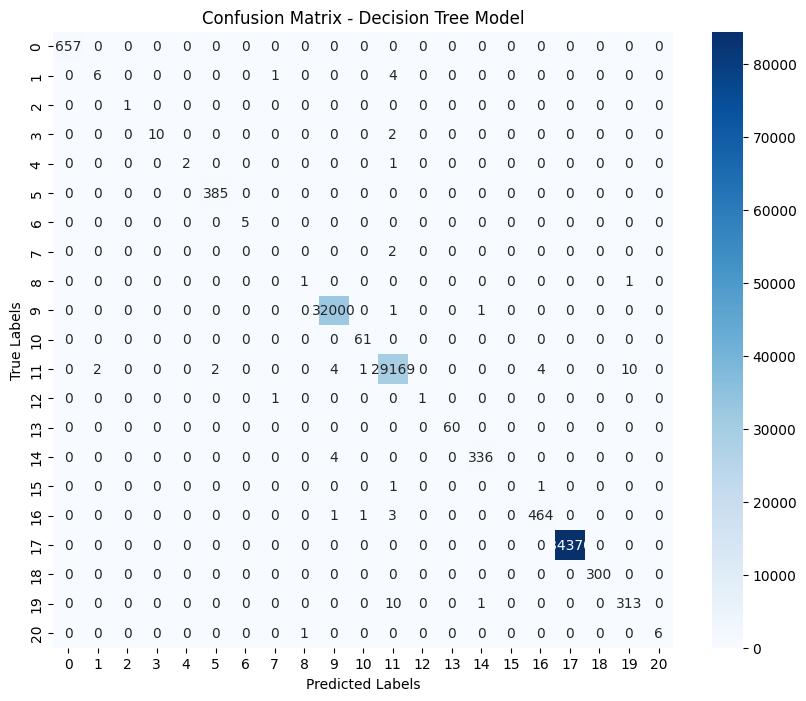

In [ ]:
# Plotting confusion matrix for Decision Tree Model
DecisionTreeModelCM = confusion_matrix(y_test, DecisionTreey_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(DecisionTreeModelCM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Implementing Logistic Regression
LogisticRegressionModel = LogisticRegression(random_state=42)

In [ ]:
# Fitting the Logistic Regression Model
LogisticRegressionModel.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
# Making Predictions
LogisticRegressiony_pred = LogisticRegressionModel.predict(X_test)

In [ ]:
# Evaluating the Performance
print(f"Accuracy of the Logistic Regression Model: {accuracy_score(y_test, LogisticRegressiony_pred) * 100:.2f} %")
print(f"\nClassification Report: \n{classification_report(y_test, LogisticRegressiony_pred)}")

Accuracy of the Logistic Regression Model: 97.62 %

Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.22      0.36       657
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00       385
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.94      1.00      0.97     32002
          10       0.00      0.00      0.00        61
          11       0.95      0.97      0.96     29192
          12       0.00      0.00      0.00         2
          14       0.00      0.00      0.00        60
          15       0.00      0.00      0.00       340
          16       0.00      0.00      0.00         2
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


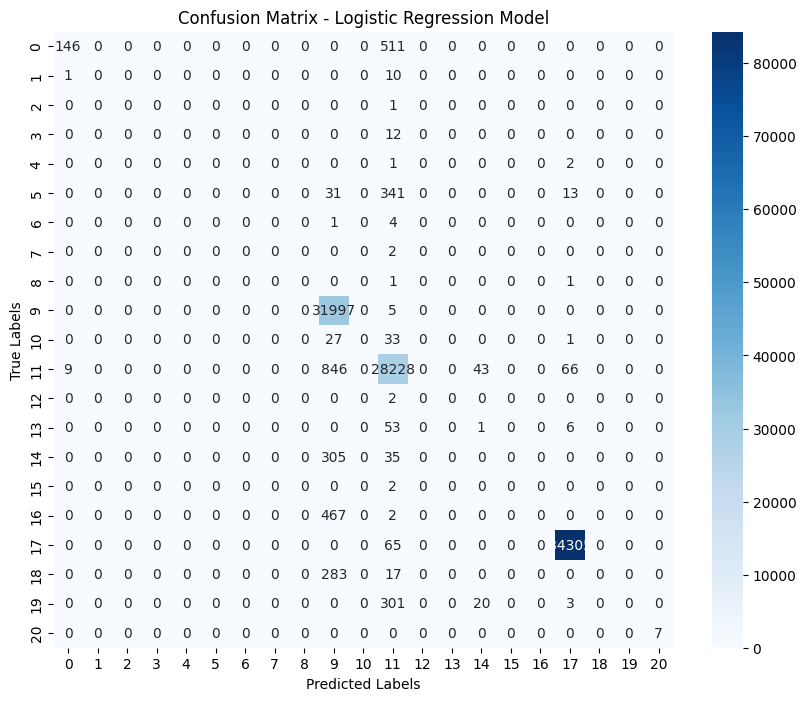

In [ ]:
# Plotting the confusion Matrix
LogisticRegressionModelCM = confusion_matrix(y_test, LogisticRegressiony_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(LogisticRegressionModelCM, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Models Comparison

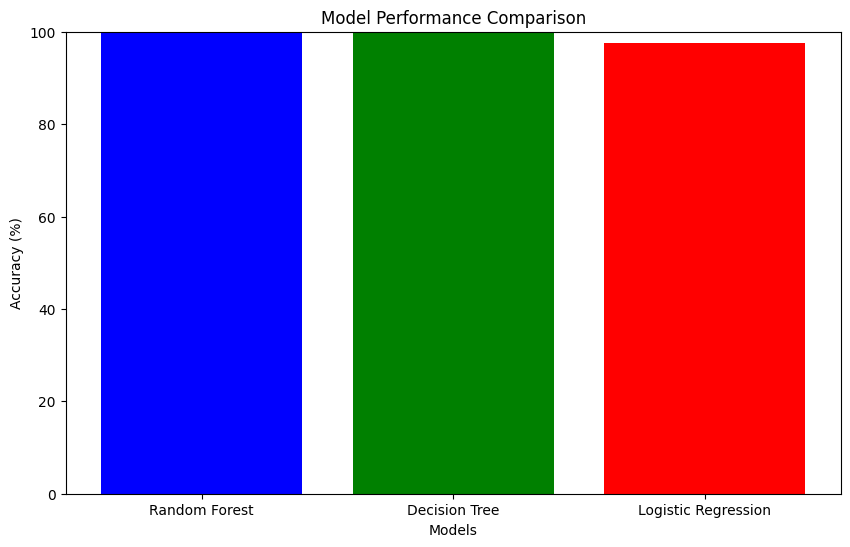

In [ ]:
# Plotting the performance of the models
Models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
Accuracies = [accuracy_score(y_test, RandomForestModely_pred) * 100,
              accuracy_score(y_test, DecisionTreey_pred) * 100,
              accuracy_score(y_test, LogisticRegressiony_pred) * 100
              ]

plt.figure(figsize=(10, 6))
plt.bar(Models, Accuracies, color=['blue', 'green', 'Red'])
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

## Anomaly Detection Analysis

In [ ]:
# Training an Isolation Forest model on the training data
IsolationModel = IsolationForest(contamination='auto', random_state=42)
IsolationModel.fit(X_train)

IsolationForest(random_state=42)

In [ ]:
# Predicting anomalies in the test data
y_predAnomaly = IsolationModel.predict(X_test)

In [ ]:
# Identifying anomalous data points
anomalies = X_test[y_predAnomaly == -1]

In [ ]:
# Printing Total Anomalies detected
print(f"Number of anomalies detected: {len(anomalies)}")

Number of anomalies detected: 20999


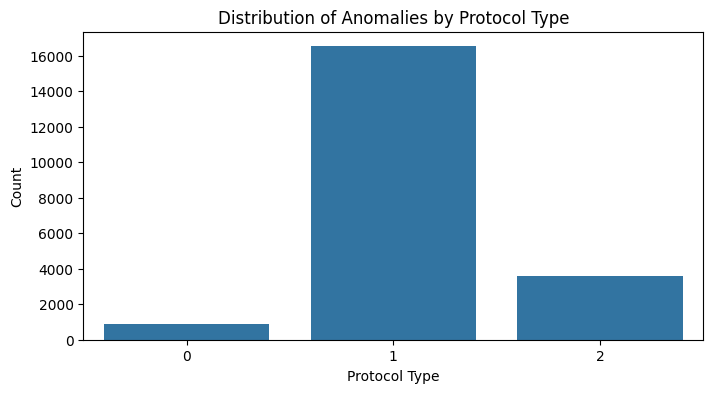

In [ ]:
# Plotting the distribution of anomalies by protocol type (if available)
if 'protocol_type' in anomalies.columns:
  plt.figure(figsize=(8, 4))
  sns.countplot(x='protocol_type', data=anomalies)
  plt.title('Distribution of Anomalies by Protocol Type')
  plt.xlabel('Protocol Type')
  plt.ylabel('Count')
  plt.show()
else:
  print("No 'protocol_type' column found in the anomalies DataFrame.")

## Feature Importances Analysis

In [ ]:
# Getting feature importances from the Random Forest model
FeatureImportances = RandomForestModel.feature_importances_

In [ ]:
# Getting feature importances from the Decision Tree model
FeatureImportancesDecisionTree = DecisionTreeModel.feature_importances_

In [ ]:
# Creating a DataFrame for Feature Importances
FeatureImportances = pd.DataFrame({'Feature': X.columns, 'Importance': FeatureImportances})

In [ ]:
# Creating a DataFrame for Feature Importances
FeatureImportancesDecisionTree = pd.DataFrame({'Feature': X.columns, 'Importance': FeatureImportancesDecisionTree})

In [ ]:
# Sorting the features by importance in descending order
FeatureImportances = FeatureImportances.sort_values('Importance', ascending=False)

In [ ]:
# Sorting the features by importance in descending order
FeatureImportancesDecisionTree = FeatureImportancesDecisionTree.sort_values('Importance', ascending=False)

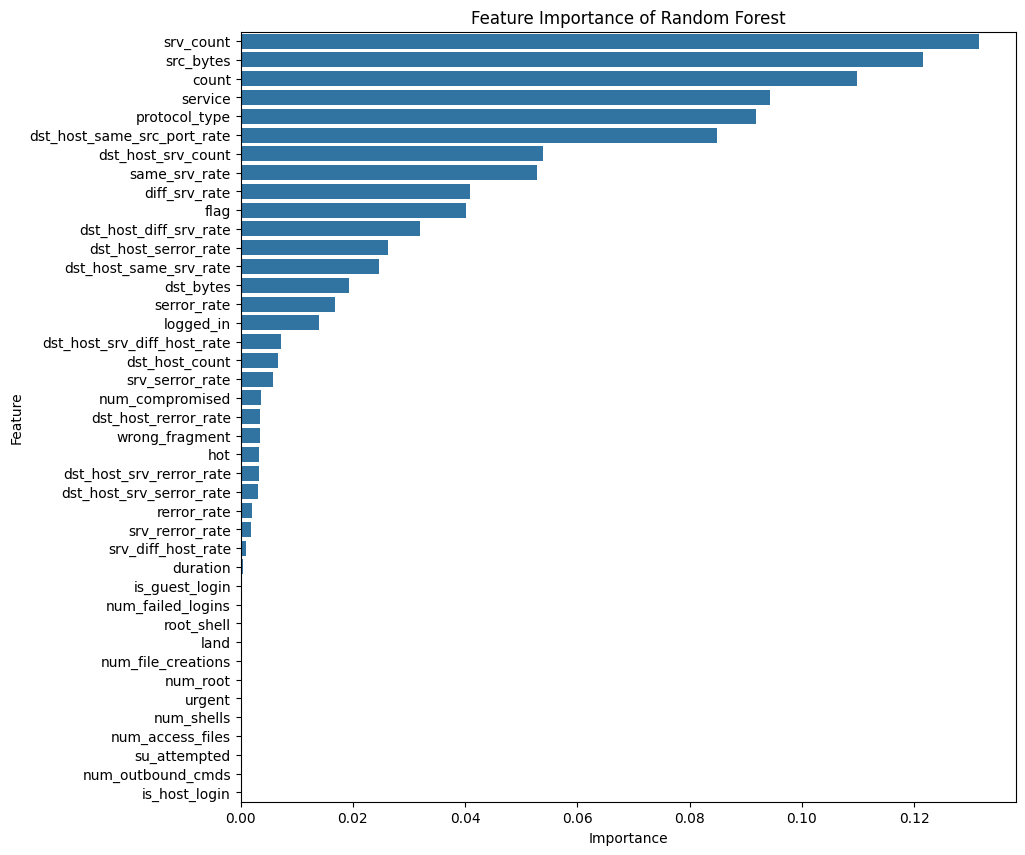

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=FeatureImportances)
plt.title('Feature Importance of Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

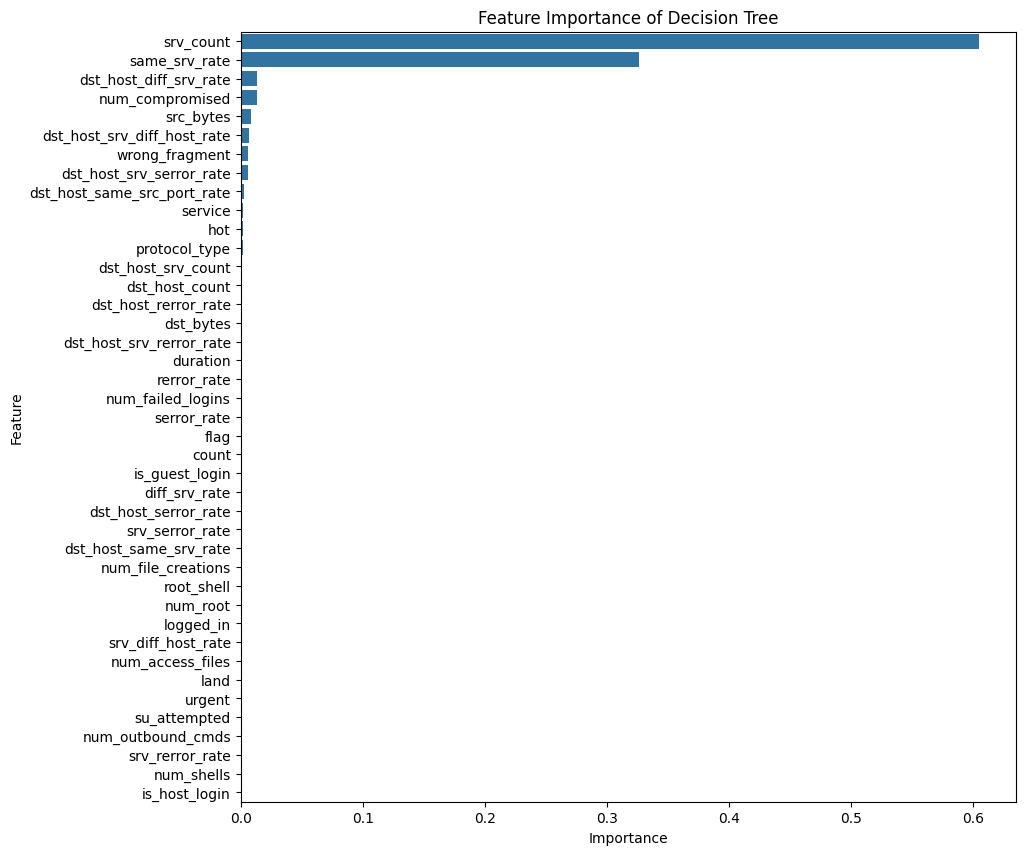

In [ ]:
# Plotting feature importances of Decision Tree
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=FeatureImportancesDecisionTree)
plt.title('Feature Importance of Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Version Control

In [ ]:
# Performing version control
#!git config --global user.email "sample@git.com"
#!git config --global user.name "Sample"
#!git init
#!git add .
#!git commit -m "Initial commit"